# Analyzing NYTbd Sample 4
<br>
This notebook is looking at the NYTbd Sample 4 content analyzed by ACCENT and PETRARCH2 to identify current limitations with PETRARCH2 and to try and devise solutions. 

In [1]:
# Setup Environment
from nltk.parse.corenlp import CoreNLPServer
from nltk.parse.corenlp import CoreNLPDependencyParser
from nltk.parse import CoreNLPParser

import pandas as pd

import pprint
import nltk

from nltk.tree import *
from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Link to Java Server for Standford CoreNLP
<br>
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -annotators "tokenize,ssplit,pos,lemma,parse,sentiment" -port 9000 -timeout 100000

In [2]:
# Connect to Server
parser = CoreNLPParser('http://localhost:9000')
depr = CoreNLPDependencyParser('http://localhost:9000')

#### Write Some Functions for Parsing Text

In [3]:
# Core Parser- save as df['parsed']
def core_parser(df, col):
    parse = []
    i = ""
    for i in range(len(df)):
        parse.append(i)
        parse[i] = next(parser.raw_parse(df[col].iloc[i]))
    return parse

# Dependency Parser- save as df['dep']
def dep_parser(df, col):
    dep = []
    i = ""
    for i in range(len(df)):
        dep.append(i)
        dep[i] = next(depr.raw_parse(df[col].iloc[i]))
    return dep

# For easy display of both parse trees, text, and code
def easy_read(corp, index_num):
    display(corp['parsed'].iloc[index_num])
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display only constituency parse with POS tags with text and code
def parsed_output(corp, index_num):
    display("AID = " + str(corp.iloc[index_num].loc['aid']))
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    display("Text = " + corp.iloc[index_num].loc['text'])
    display(corp['parsed'].iloc[index_num])

# function to display only dependency parse with text and code
def dependency_output(corp, index_num):
    display(corp['dep'].iloc[index_num])
    display("Text = " + corp.iloc[index_num].loc['text'])
    display("Code = " + str(corp.iloc[index_num].loc['code']))
    
# function to display constituency parse of a single sentence
def one_sentence_parser(text):
    output = next(parser.raw_parse(text))
    return output

## Read in NYTbd Sample 4 Data- ACCENT and PETRARCH

In [4]:
accent5 = pd.read_stata("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 5/Sample5_run1/Accent_sample5_events_text.dta")
petrarch5_full = pd.read_stata("/Volumes/PartTime/Jonathan Bonaguro - Spring 2020/NYTbd sample 5/Sample5_run1/Petrach_NYTbd_sample5_run1_events_text.dta")

In [5]:
# Convert Data Types to int32
petrarch5_full['code'] = petrarch5_full['code'].astype('int32')
petrarch5_full['aid'] = petrarch5_full['aid'].astype('int32')

accent5['code'] = accent5['code'].astype('int32')
accent5['aid'] = accent5['aid'].astype('int32')

# extract relevant_codes from accent5
relevant_codes = accent5.code.unique()

# trim petrarch5_full down to relevant codes
petrarch5 = petrarch5_full[petrarch5_full['code'].isin(relevant_codes)]

## Parse Text

In [6]:
%time 
accent5['parsed'] = core_parser(accent5, 'text')
accent5['dep'] = dep_parser(accent5, 'text')

petrarch5['parsed'] = core_parser(petrarch5, 'text')
petrarch5['dep'] = dep_parser(petrarch5, 'text')

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
keys = list(['aid', 'code'])
accent5_index = accent5.set_index(keys).index
petrarch5_index = petrarch5.set_index(keys).index

# Produce df's of mutually exclusive events 
accent5_only = accent5[~accent5_index.isin(petrarch5_index)]
petrarch5_only = petrarch5[~petrarch5_index.isin(accent5_index)]

# Produce df's of same article, same coding
accent5_same_code = accent5[accent5_index.isin(petrarch5_index)]
petrarch5_same_code = petrarch5[petrarch5_index.isin(accent5_index)]

# sort values on AID and reset index 
accent5_only = accent5_only.sort_values('aid').reset_index(drop = True)
petrarch5_only = petrarch5_only.sort_values('aid').reset_index(drop = True)

accent5_same_code = accent5_same_code.sort_values('aid').reset_index(drop = True)
petrarch5_same_code = petrarch5_same_code.sort_values('aid').reset_index(drop = True)

## Look for errors in ACCENT and remove from data
<br>
Event codes: 1711, 1712, 1724, 182, 1821, 1822, 1823, 185, 186

'AID = 22770393'

'Code = 186'

'Text = The decrees were issued under a state of siege invoked two and a half years ago when drug traffickers killed a Cabinet minister .'

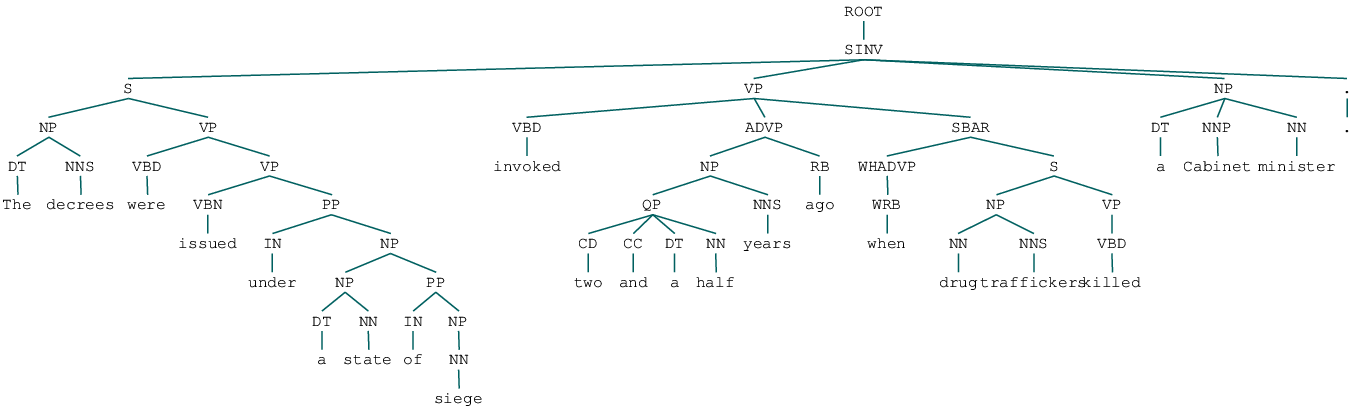

0

In [25]:
# for i in range(len(petrarch5_only[petrarch5_only.code == 186])):
#    parsed_output(petrarch5_only[petrarch5_only.code == 186], i)
#    display(i)

In [26]:
# trim errors out of ACCENT output : refer to "ACCENT_SAMPLE5_ERRORS.docx" for documentation of errors
accent5_1711 = accent5_only[accent5_only.code == 1711].reset_index(drop = True).drop([1, 2, 3, 4, 5, 10, 14, 15, 16, 18, 22, 23]).reset_index(drop = True)

accent5_1712 = accent5_only[accent5_only.code == 1712].reset_index(drop = True).drop([2, 9, 10, 11, 18]).reset_index(drop = True)

accent5_182 = accent5_only[accent5_only.code == 182].reset_index(drop = True).drop([2, 6, 7, 12, 13, 16, 17, 18, 21, 22]).reset_index(drop = True)

accent5_1821 = accent5_only[accent5_only.code == 1821].reset_index(drop = True).drop([14, 21]).reset_index(drop = True)

accent5_1822 = accent5_only[accent5_only.code == 1822].reset_index(drop = True).drop([8, 9, 10, 11, 15, 16, 21]).reset_index(drop = True)

accent5_1823 = accent5_only[accent5_only.code == 1823].reset_index(drop = True).drop([9]).reset_index(drop = True)

accent5_185 = accent5_only[accent5_only.code == 185].reset_index(drop = True).drop([16, 18]).reset_index(drop = True)

accent5_186 = accent5_only[accent5_only.code == 186].reset_index(drop = True).drop([3, 7, 18]).reset_index(drop = True)

## Print ACCENT Output to Identify Dictionary Improvements

'AID = 22489941'

'Code = 1712'

'Text = "The East German authorities have demolished the house of a sculptor arrested in June for refusing to do military service, sources in contact with his friends said today.\\nMichael Blumhagen was arrested by state security officers June 16.\\nHis friends said the real reason for the arrest was a statue he had sculpted and erected without permission, in memory of a friend who died in state custody.\\nThe house, near Jena in southern East Germany,'

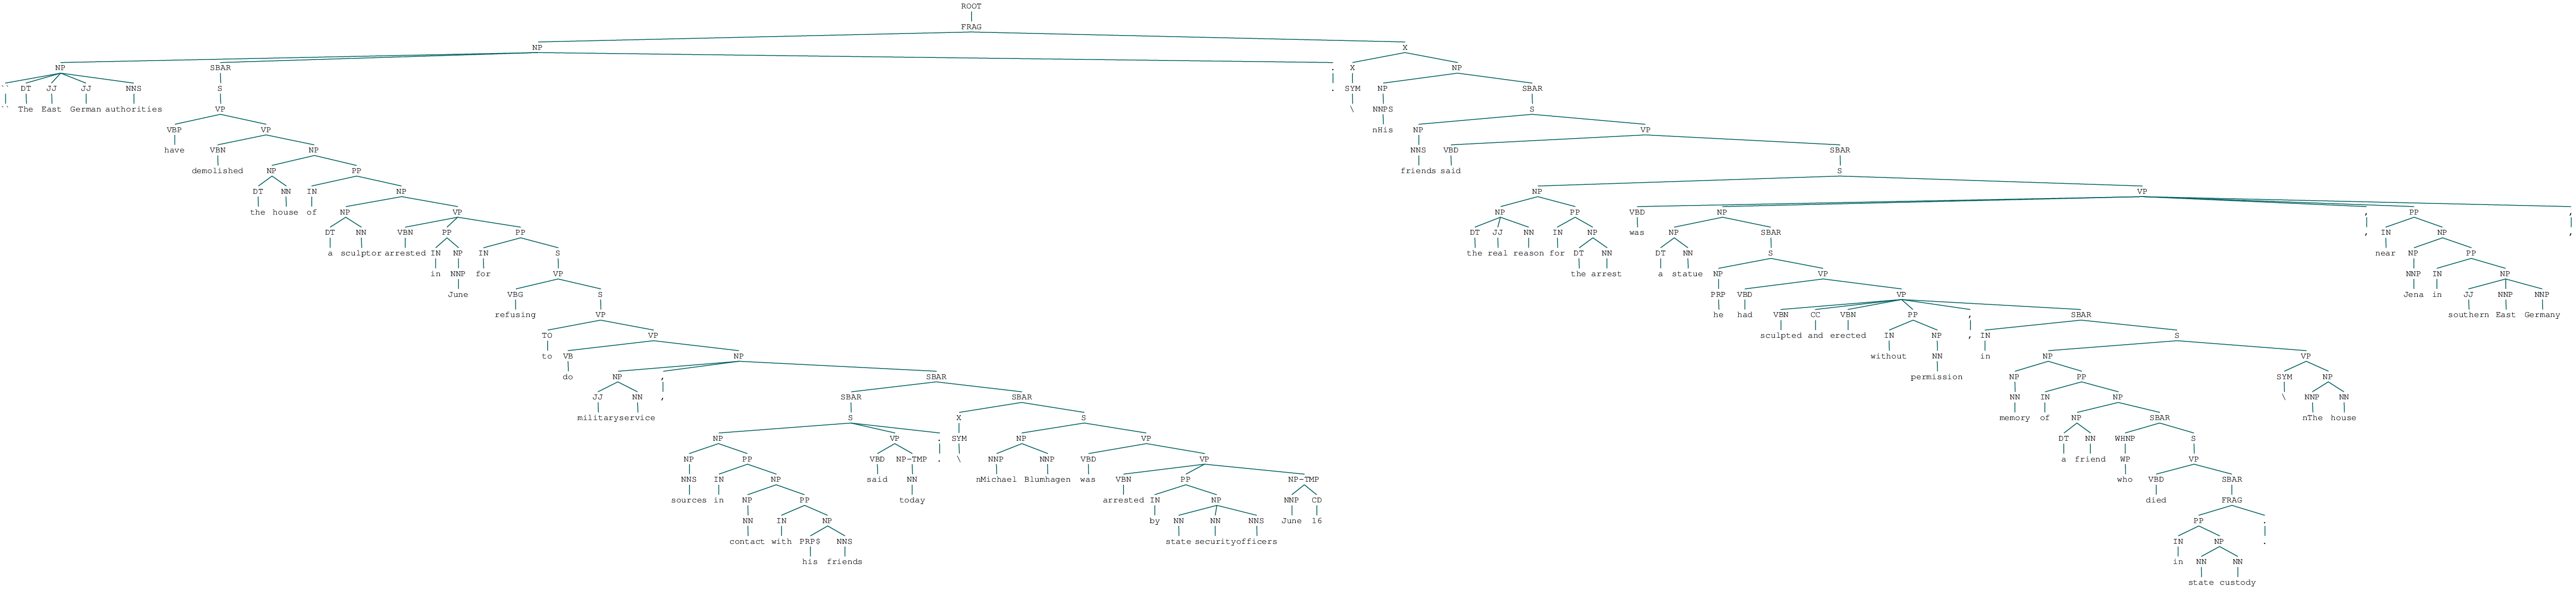

0

'AID = 22527537'

'Code = 1712'

'Text = Cuban fighter planes attacked and sank the Bahamian ship; four lives were lost.\\n\\n\\n\\nTypically, when nations seize ships for fishing in what they regard as their waters or taking more than an allowable catch, they impose fines and confiscate the haul.'

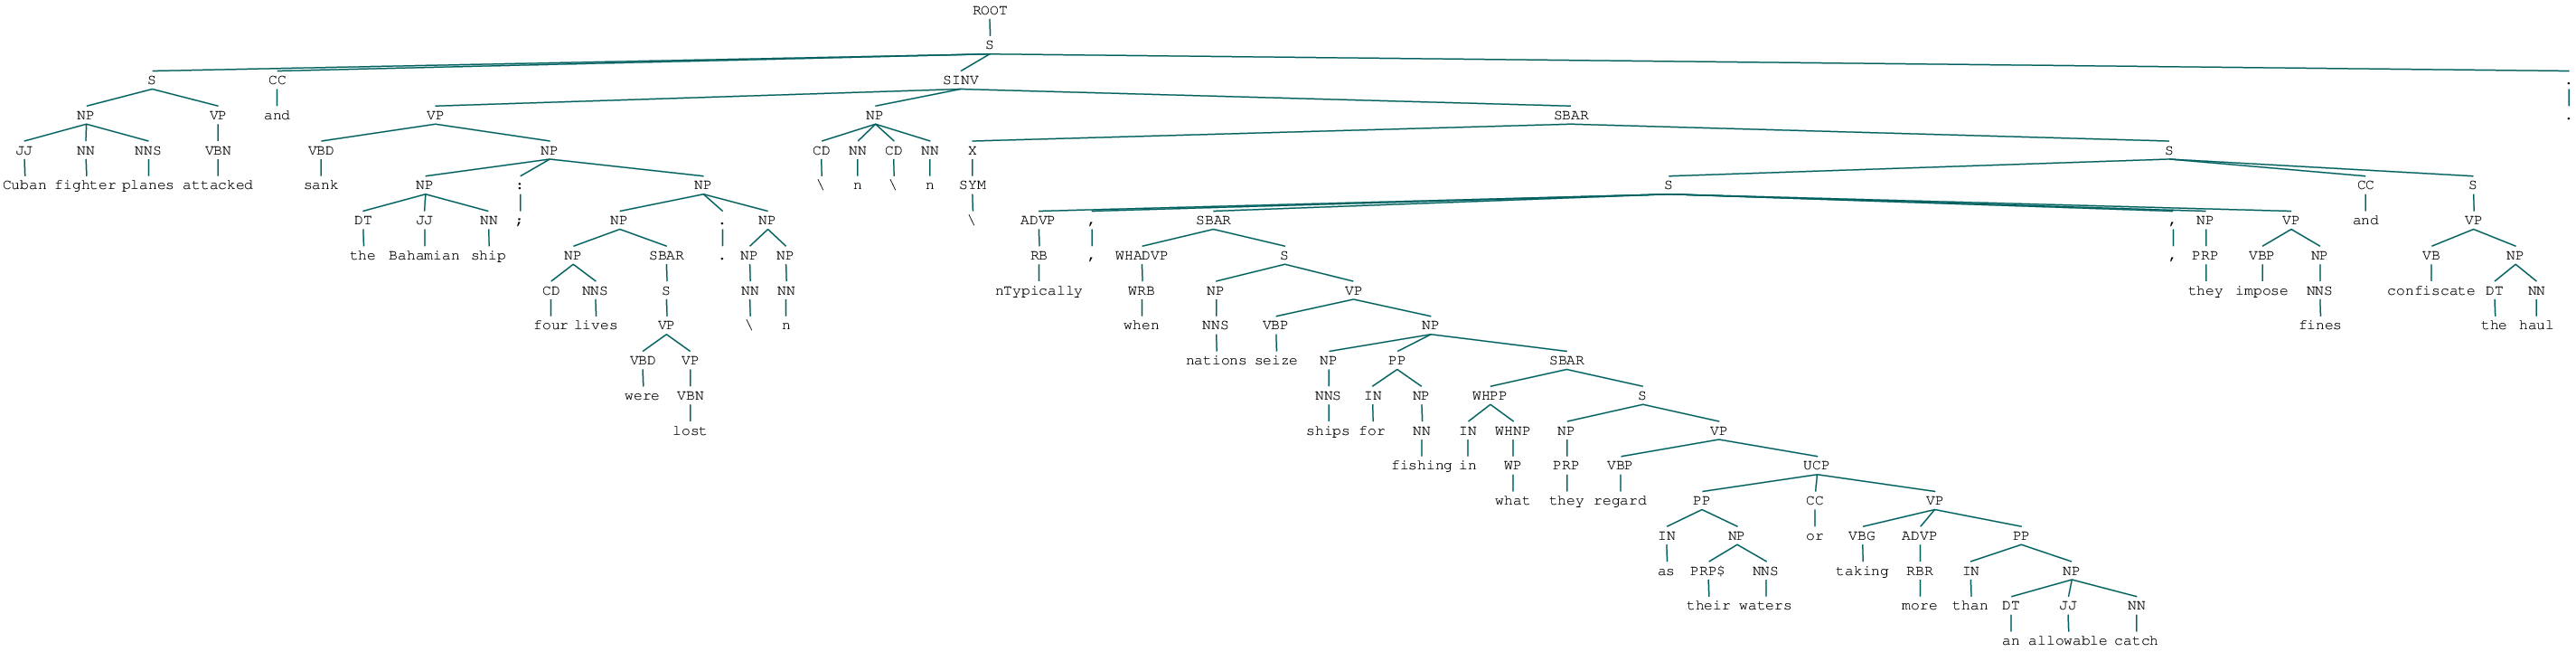

1

'AID = 22784155'

'Code = 1712'

'Text = Civil rights groups monitoring the detentions say between 12,000 and 16,000 people, most of them black activists, have been seized.\\n\\n\\nIn a separate development, the authorities in Cape Town, pursuing a campaign to disperse the residents of the huge squatter camp known as Crossroads, were said by witnesses today to have demolished the homes of more than 100 families.\\n\\nAlso In Cape Town, the Progressive Federal Party, the official white opposition party in the segregated three-chamber Parliament, took the unusual step of withdrawing its traditional cooperation with the Government in ordering parliamentary business.'

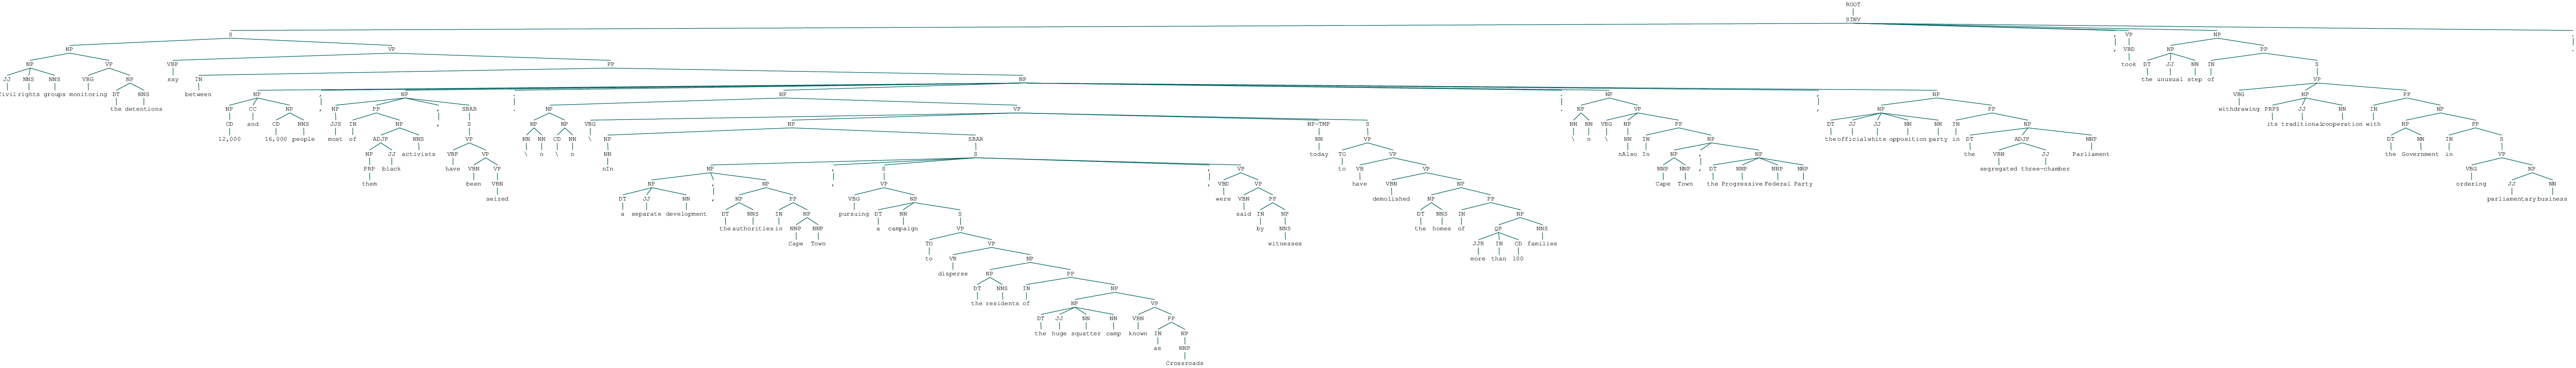

2

'AID = 22794864'

'Code = 1712'

"Text = She has refused to move since the state took her property by eminent domain and demolished her home.\\n\\n\\n''The state must look into this situation,'' State Representative Casey said."

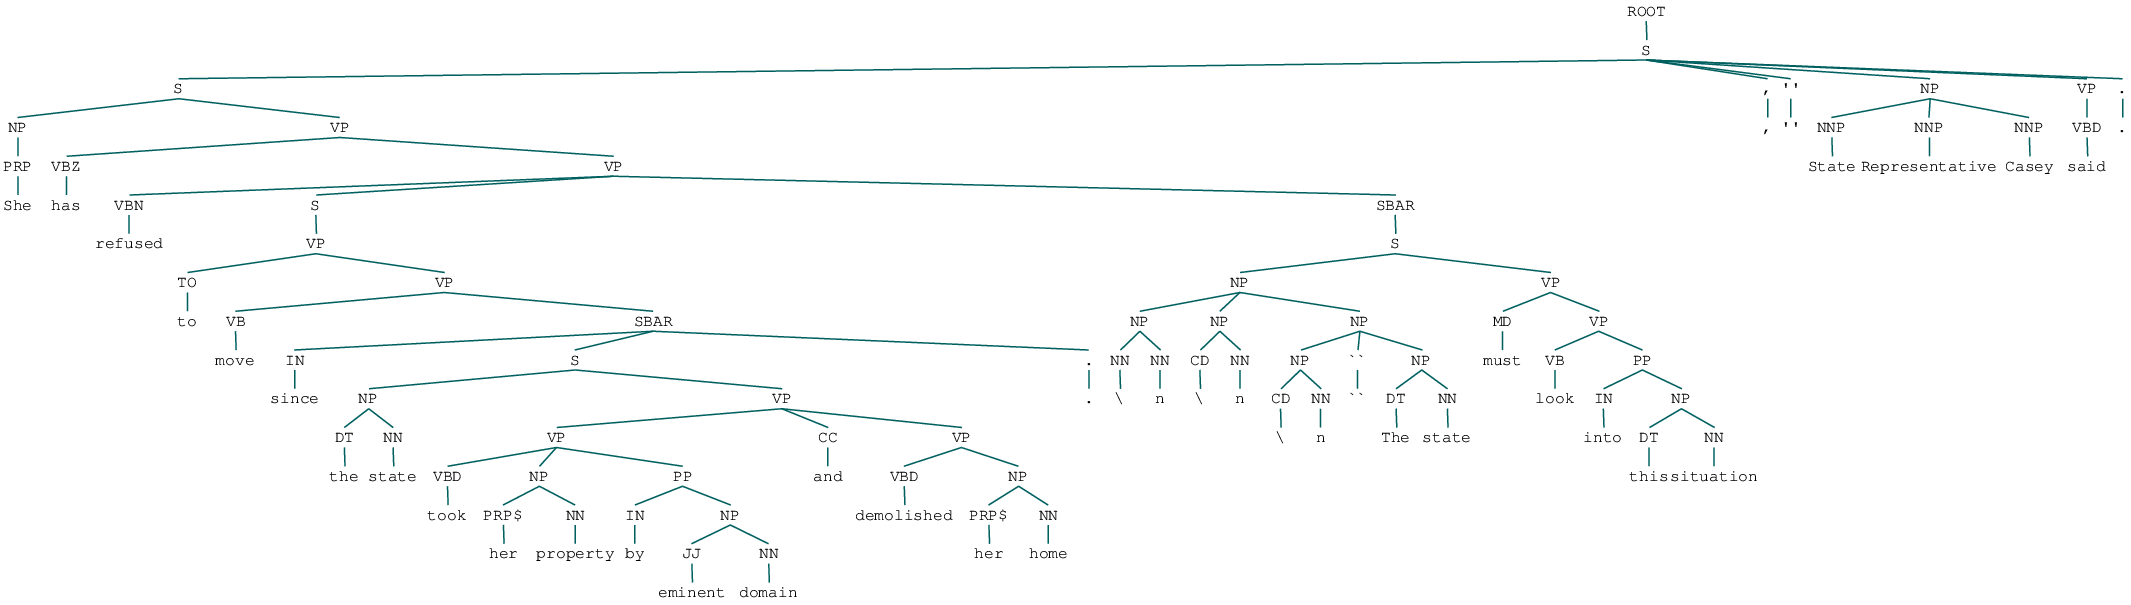

3

'AID = 22927456'

'Code = 1712'

"Text = The army spokesman, asked about this today, said that troops were blowing up the houses of families known to have members who threw stones.\\n\\n\\nHowever, the Israeli newspaper Hadashot, echoing a widespread assesment, viewed the demolitions as a political sop to the settlers.\\n\\n''If the facts are known, why are houses being blown up?''"

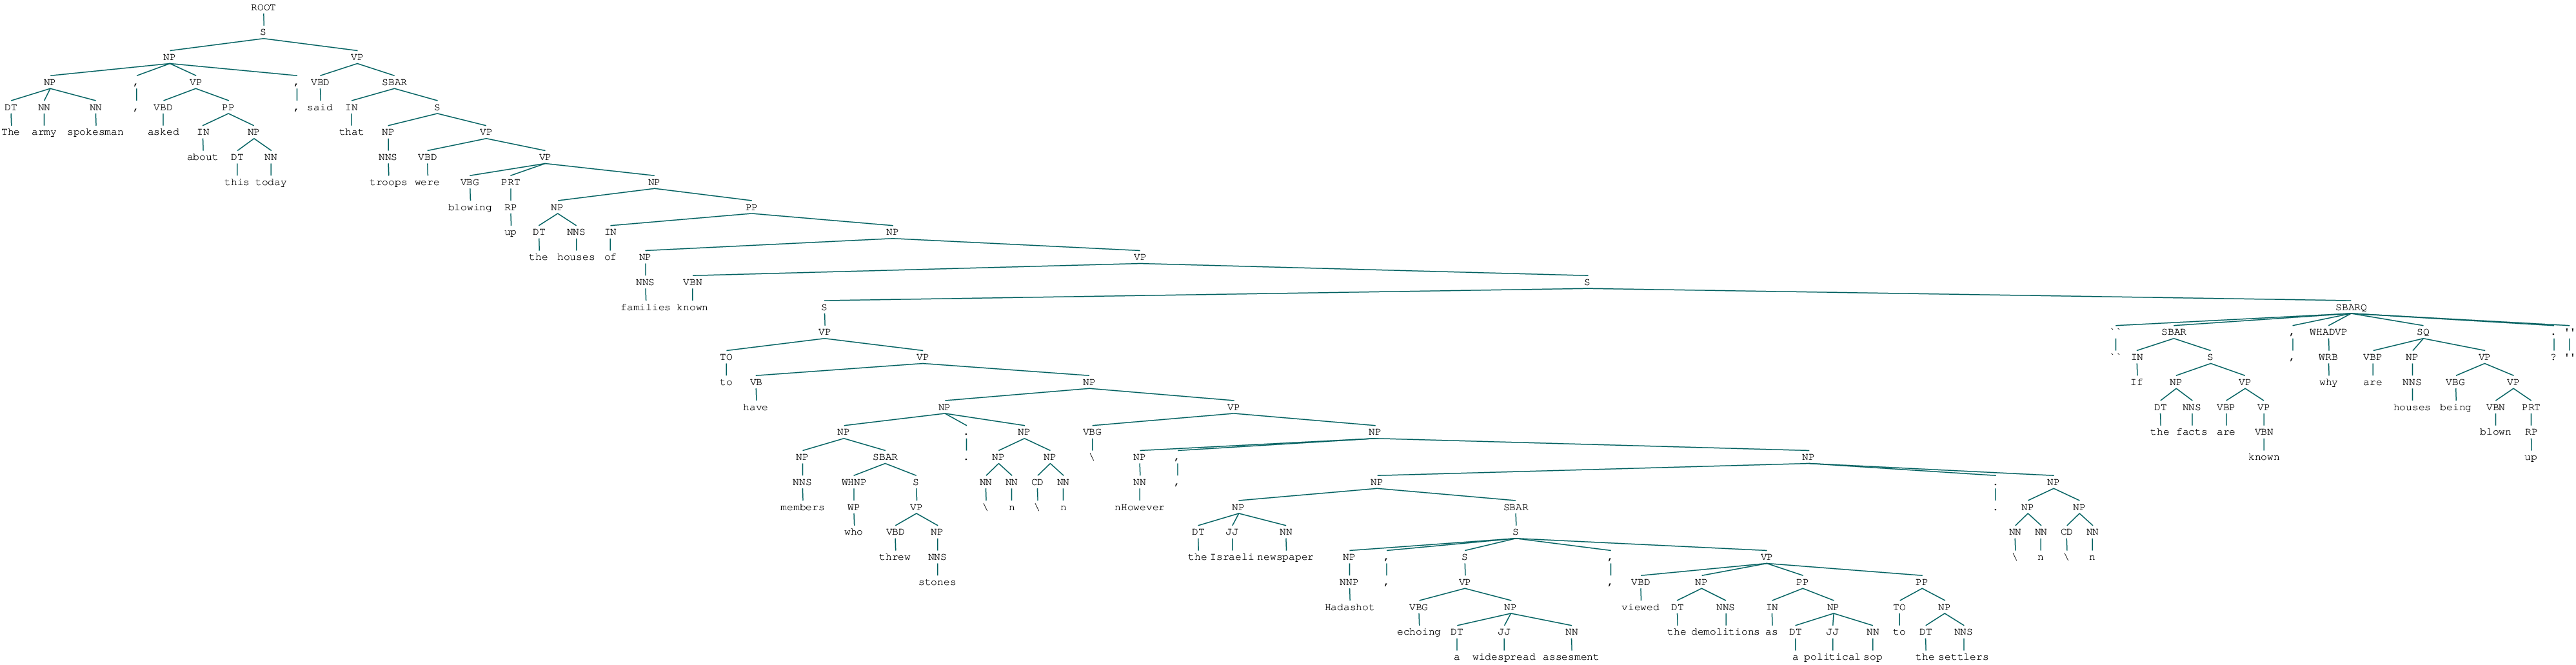

4

'AID = 23276597'

'Code = 1712'

'Text = The baby was a second child, a boy, and the parents did not wait the four years before a second child is allowed in this area.\\n\\nInstead, the baby was born five months before the time limit, so the local authorities destroyed the home and took the cow.'

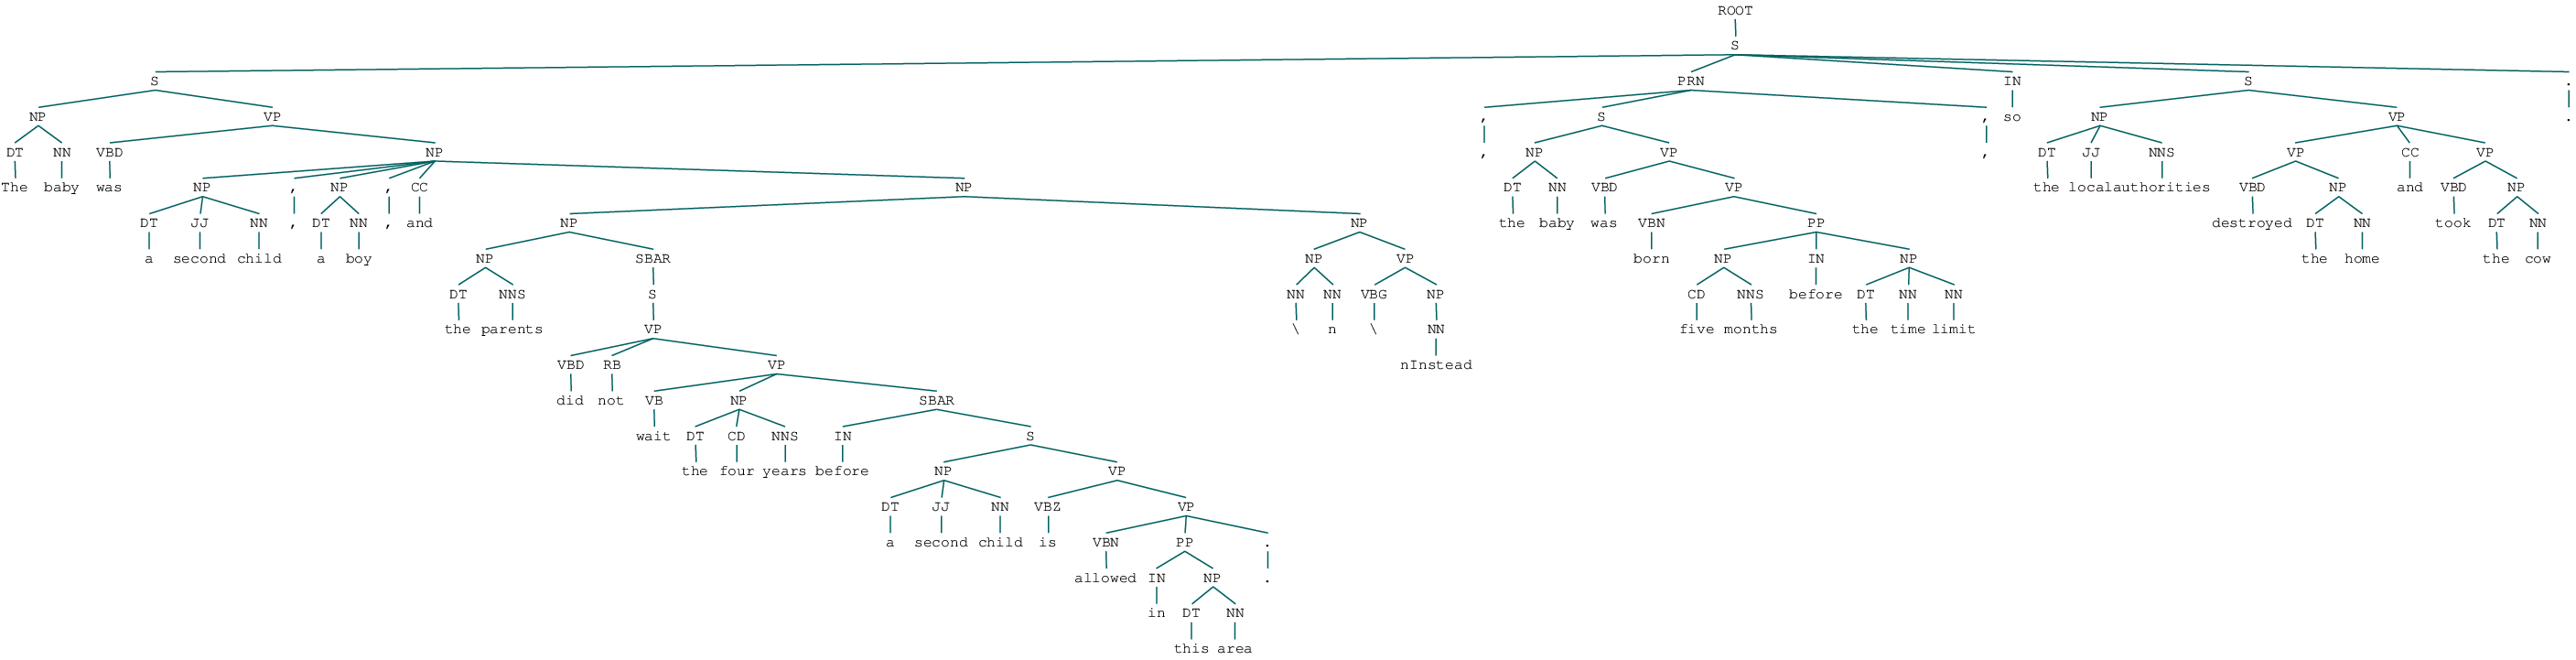

5

'AID = 23488638'

'Code = 1712'

'Text = "Government troops have fled the last major city still in their hands in northeastern Zaire, looting the town and destroying homes before abandoning it to rebel forces without a fight, residents said today.\\nBunia, a trading center located about 100 miles north of here near Lake Albert, was reported by residents, contacted on ham radio,'

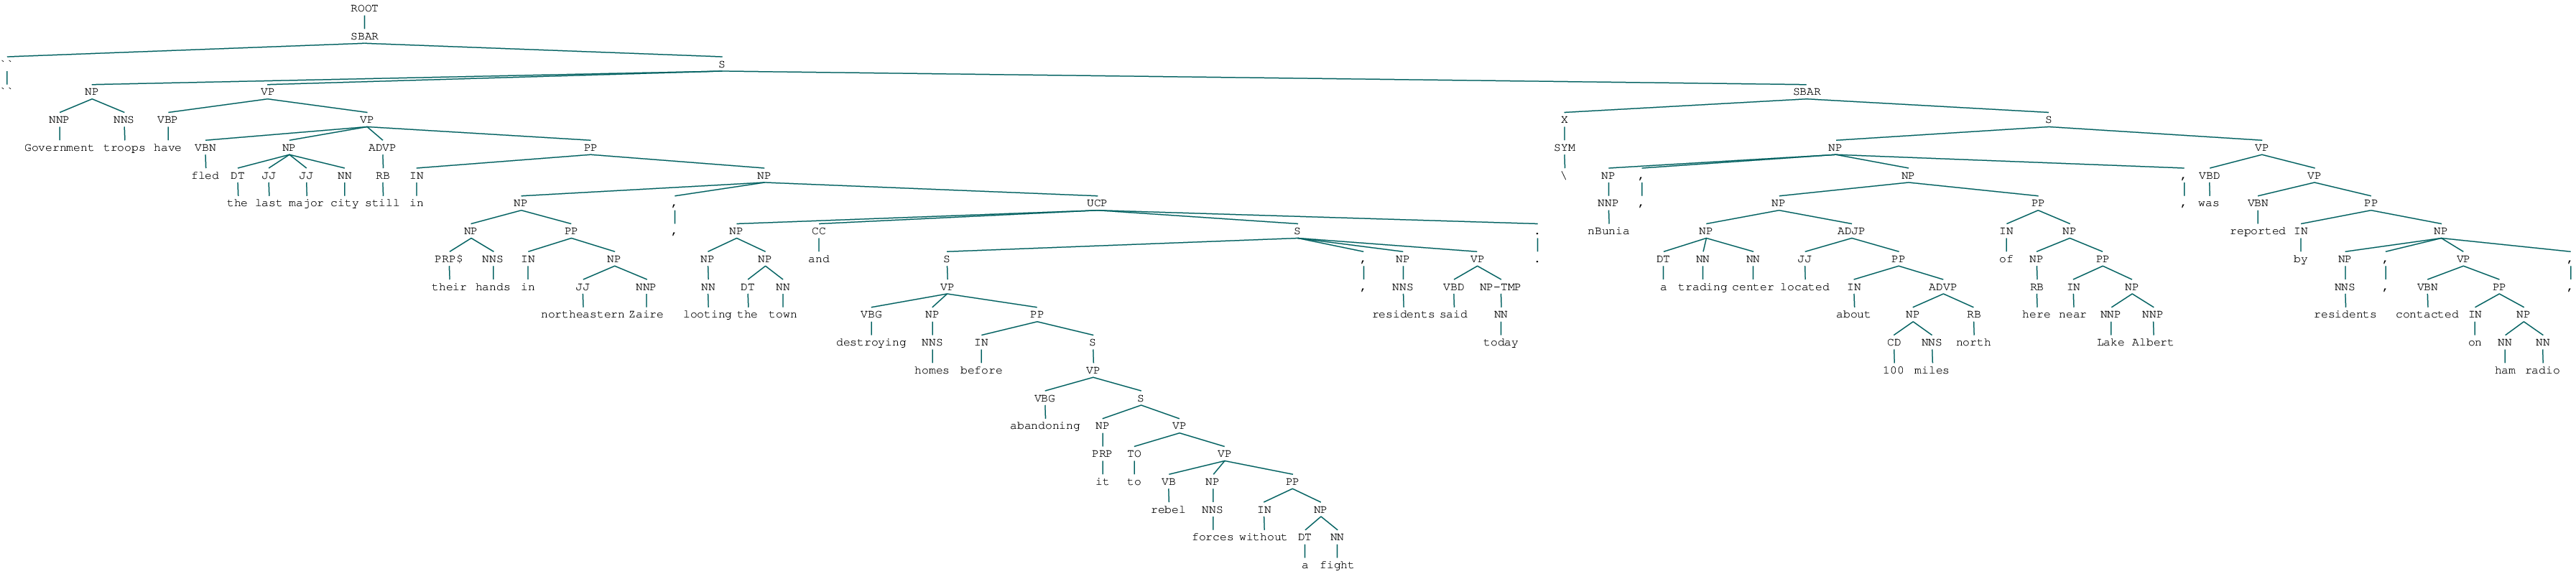

6

'AID = 23547115'

'Code = 1712'

"Text = Mr. Roman, 25, a receptionist in a New York University residence hall, said the police broke down the doors to his parents' downstairs residence and his upstairs apartment in the home he owns at 226 Barbey Street in East New York at 6 A.M. and proceeded to ''wreck everything.''"

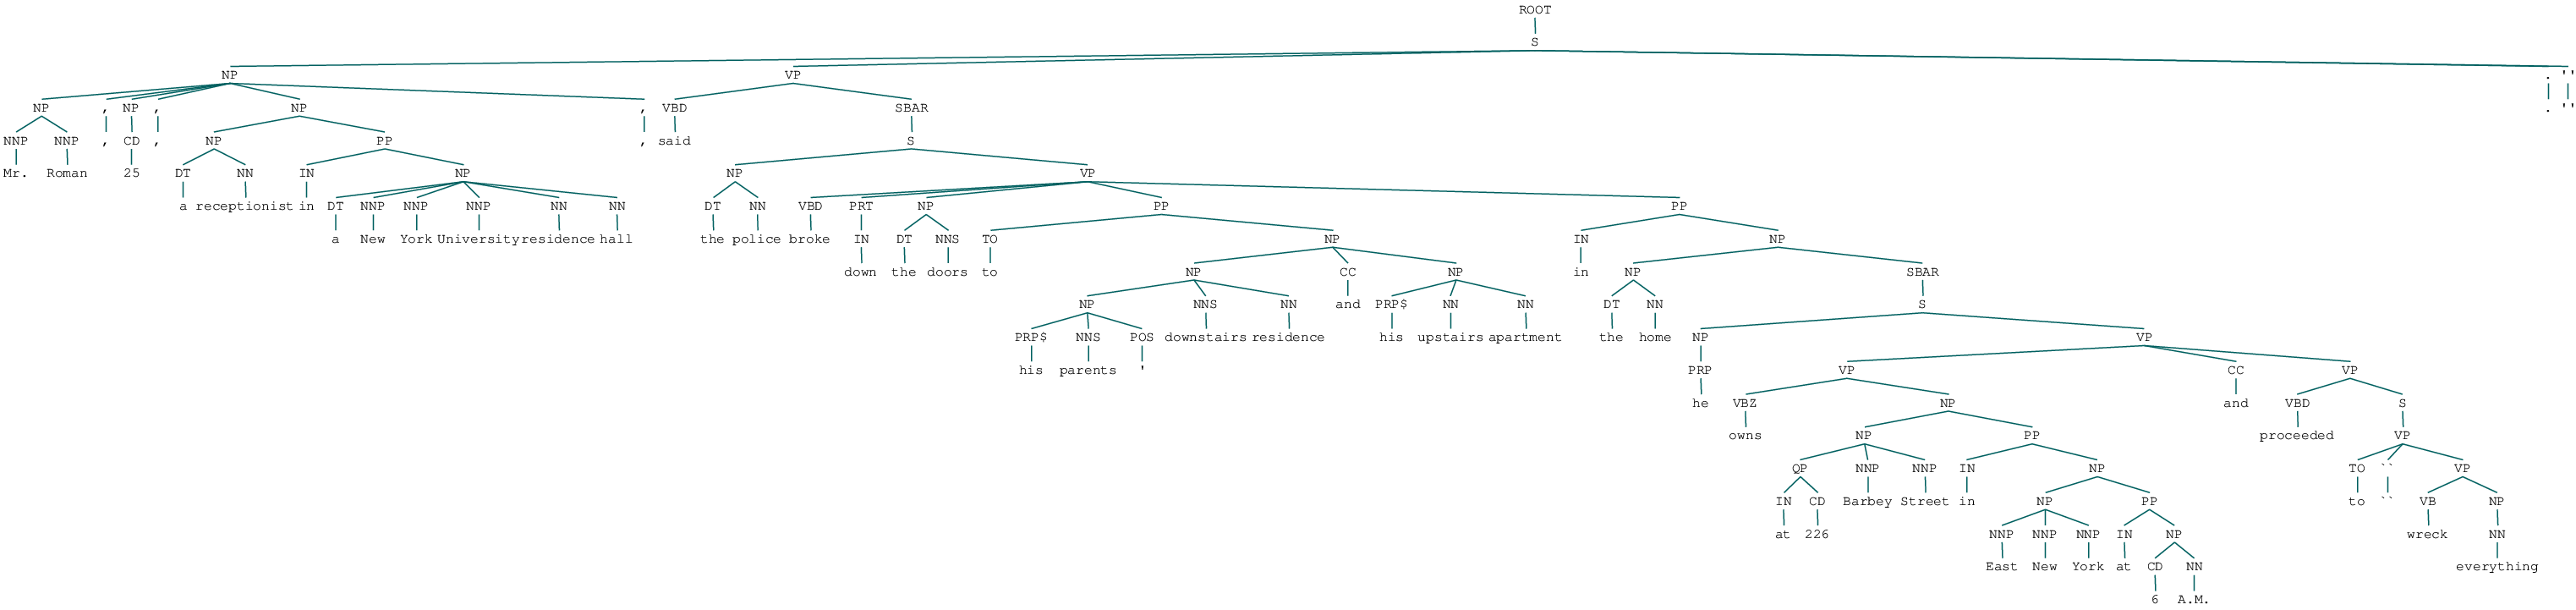

7

'AID = 23812196'

'Code = 1712'

'Text = In this region of central Afghanistan, the Taliban destroyed the homes of the Hazaras and drove them out.'

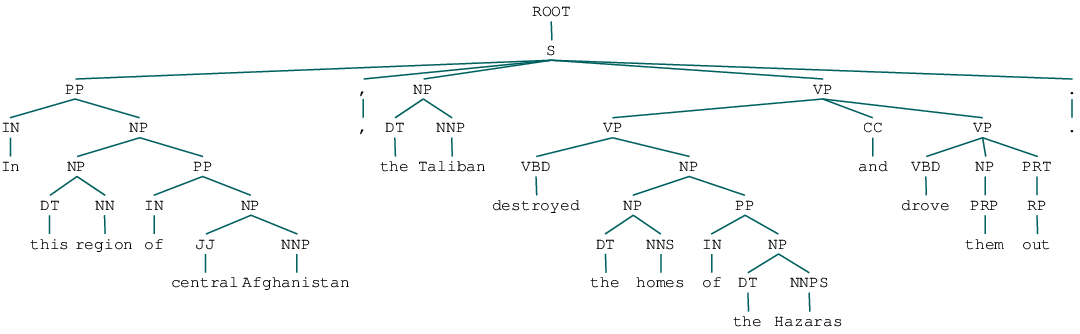

8

'AID = 23815690'

'Code = 1712'

'Text = Apparently retaliating for the killing of 19 soldiers, hundreds of soldiers killed at least 500 civilians and destroyed countless buildings and houses in 16 towns and villages in the rural state of Benue.'

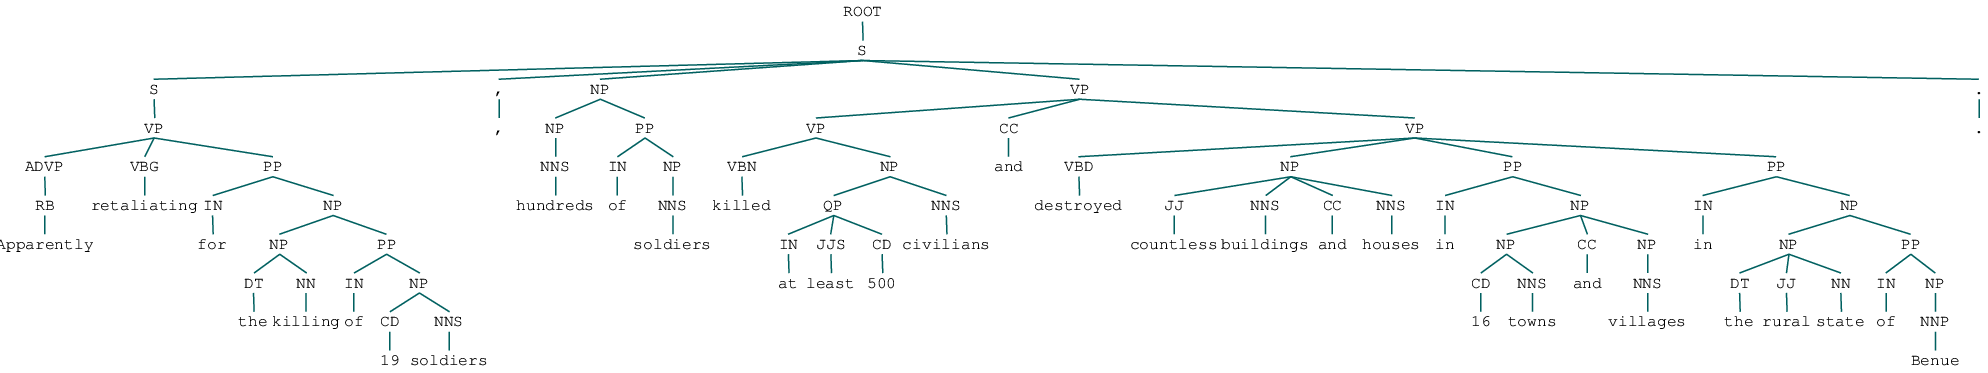

9

'AID = 23840277'

'Code = 1712'

'Text = He was not home, but the soldiers burned down his house, Palestinians there said.'

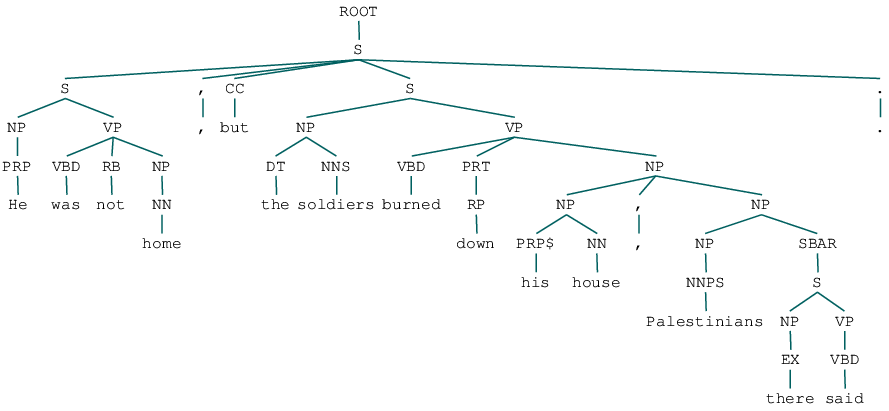

10

'AID = 23921088'

'Code = 1712'

'Text = It may also have cost him his life.\\n\\n\\n\\nSince Mr. Djindjic was shot outside his office on Wednesday, the police have detained more than 180 suspects for questioning and destroyed the house of the leader of a Belgrade gang linked to the assassination.'

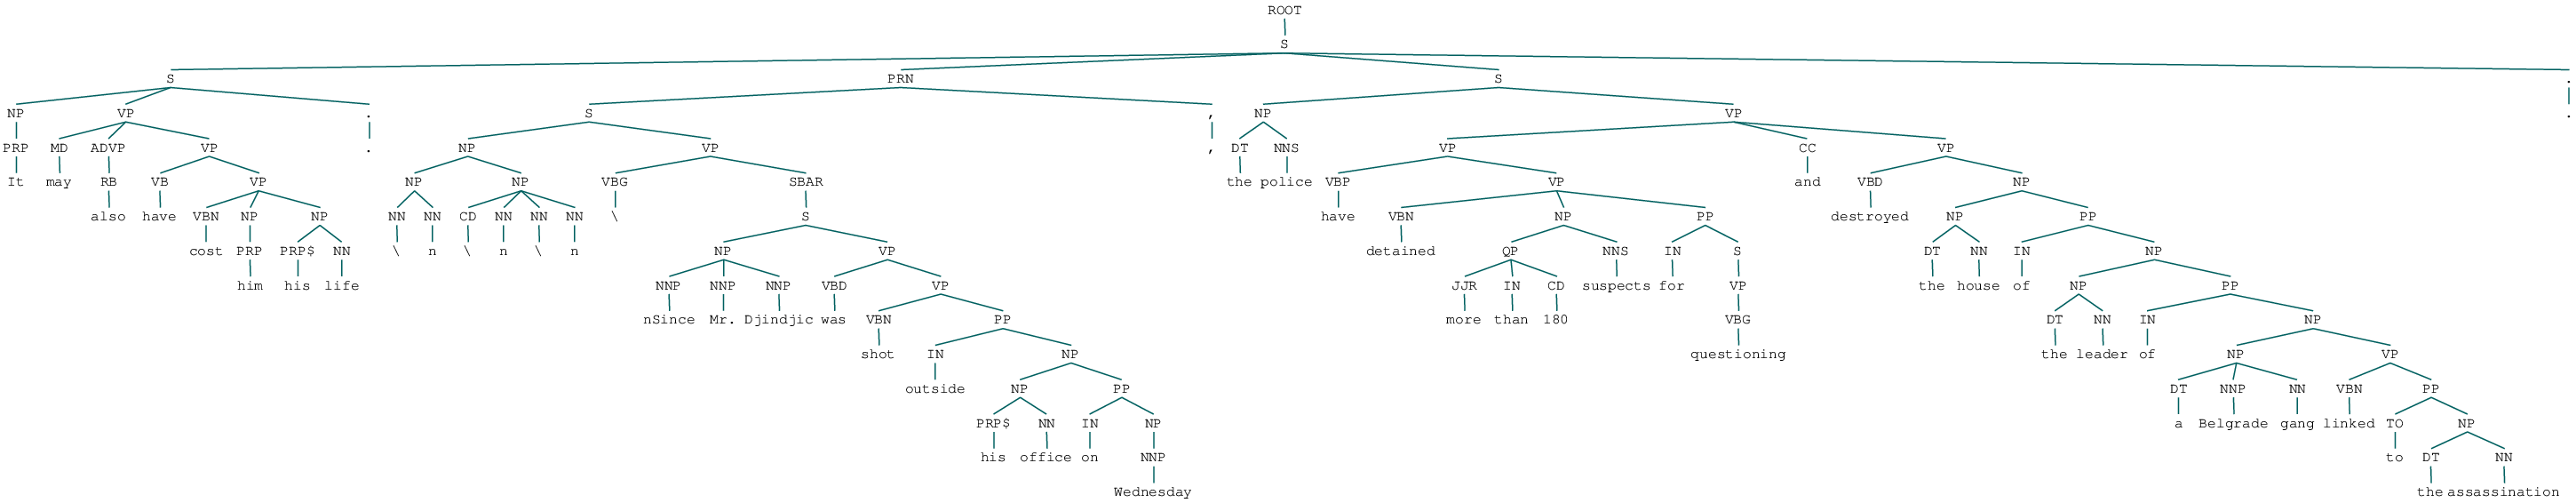

11

'AID = 23949937'

'Code = 1712'

'Text = More than 60 others were wounded, Palestinian officials and witnesses said.\\n\\n\\nAs troops searched through buildings in the camp, a Palestinian sniper opened fire, killing an army photographer who was recording the raid and wounding two other soldiers.\\nSmugglers have generally concealed their tunnel entrances beneath houses and other structures.\\nDuring the incursion, Israeli forces demolished the three-story family home of Muhammad Abu Shamala, a leader of Hamas.'

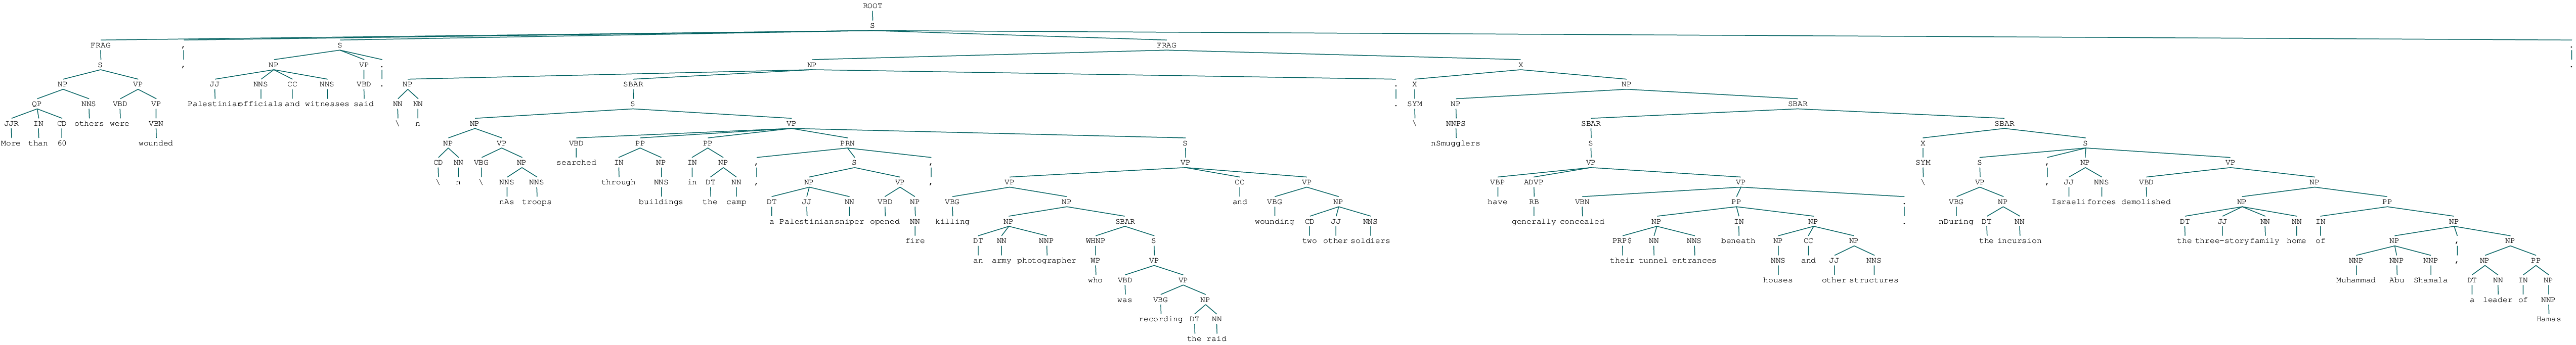

12

'AID = 23956108'

'Code = 1712'

'Text = Mr. Saba, 50, was a member of Islamic Jihad who had waged a gun battle with Israeli troops as they moved in to destroy his home on Sunday.\\n\\n\\n\\nIslamic Jihad had said Sunday that Mr. Saba had escaped.'

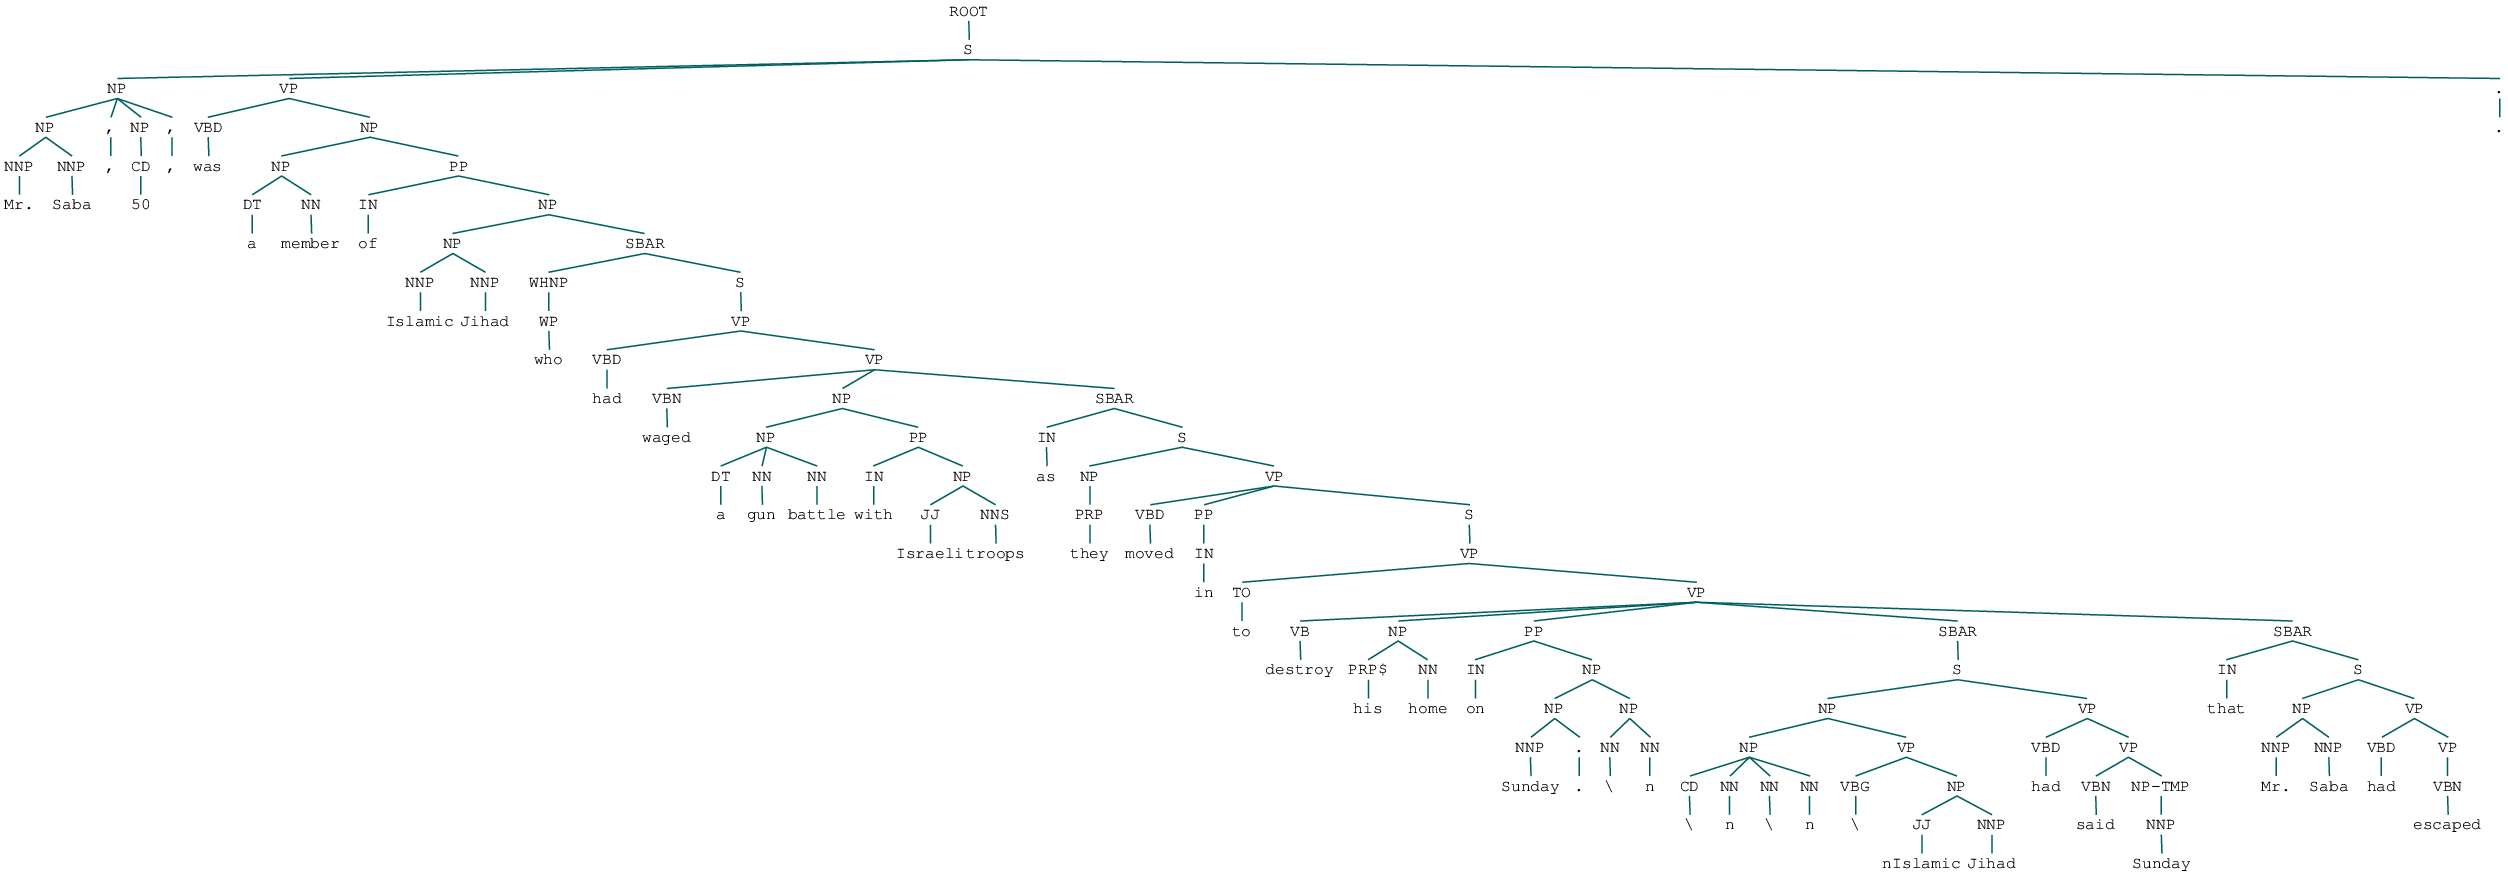

13

'AID = 23994712'

'Code = 1712'

"Text = Israel destroys the houses of Palestinians involved in violence, saying it serves as both punishment and a deterrent to future attacks.\\nThe Palestinian Authority, headed by Yasir Arafat, condemned Wednesday's bombing, though Al Aksa Martyrs Brigades, a group loyal to Mr. Arafat, claimed responsibility for the attack.\\n\\nThe relationship between Al Aksa and Mr. Arafat's Fatah movement has been somewhat murky."

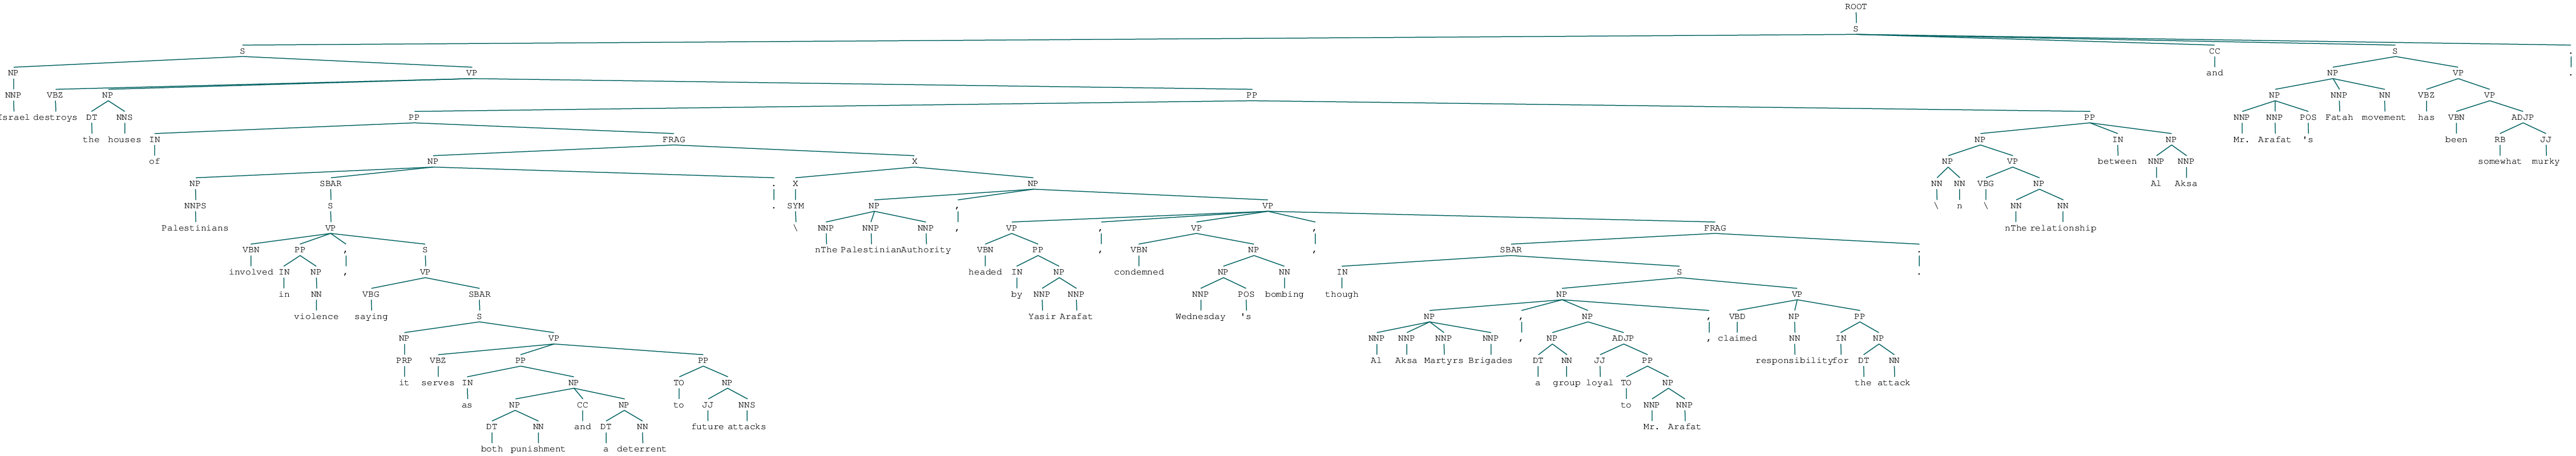

14

'AID = 24027447'

'Code = 1712'

'Text = Or they could go to one of the 24 resettlement camps that the government has started to build for some of the displaced.\\nBut the notion of large numbers of people in close quarters guarded by soldiers raises sour memories -- and some real fear -- in the Aceh region of northwestern Sumatra, where the government has fought an insurgency for nearly 30 years.\\n\\nIn various phases of the long-running civil conflict, the government has herded people into relocation camps, often after houses were destroyed by the army.'

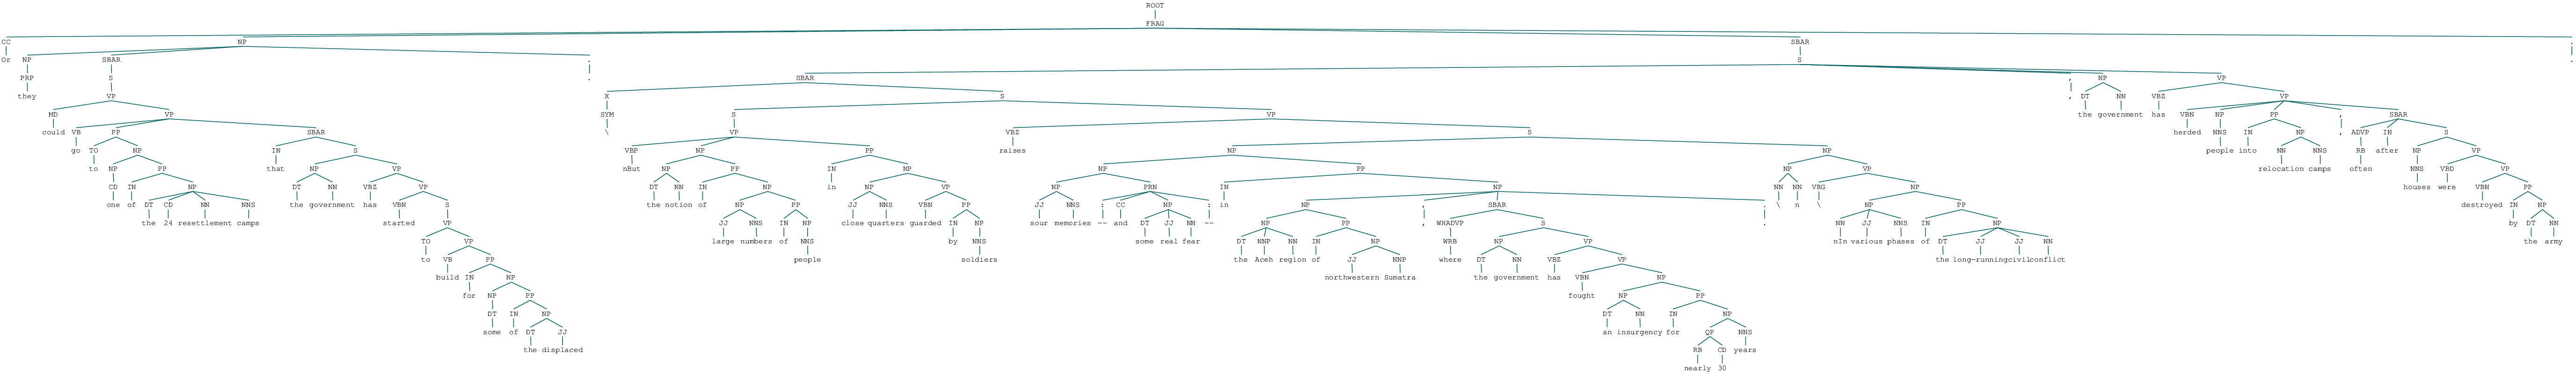

15

In [36]:
for i in range(len(accent5_1712)):
    parsed_output(accent5_1712, i)
    display(i)

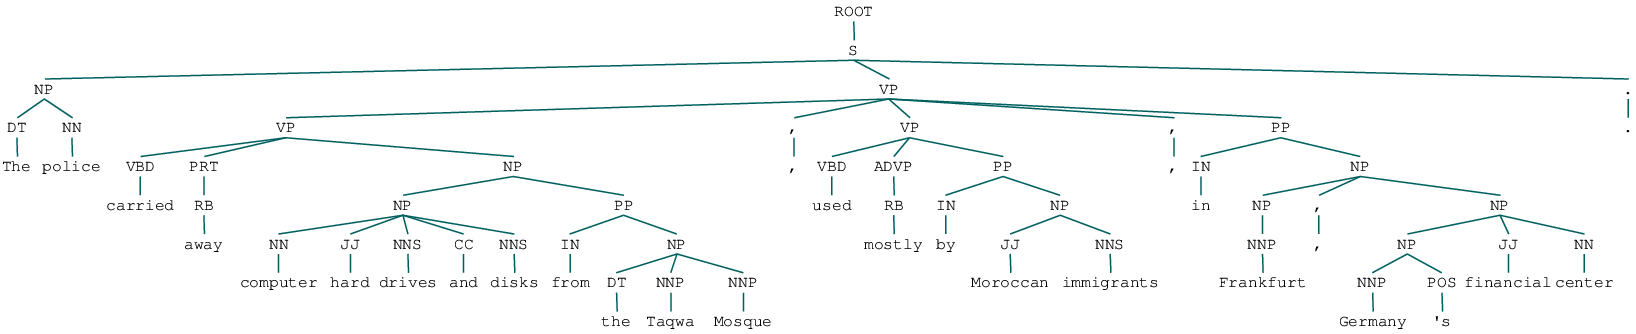

In [35]:
one_sentence_parser("The police carried away computer hard drives and disks from the Taqwa Mosque, used mostly by Moroccan immigrants, in Frankfurt, Germany\'s financial center.")